In [151]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Librerías para arboles de decision 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Librerias para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [152]:
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/Titanic.csv'
df = pd.read_csv(url, sep = ',')

In [153]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
# Ojo, la edad tiene valores faltantes:
df['Age'].isnull().value_counts()

Age
False    714
True     177
Name: count, dtype: int64

In [155]:
# Antes de entrenar, completo valores vacíos de la variable edad: 
edad_mediana = df['Age'].mean()
df['Age_Completa'] = df['Age'].fillna(edad_mediana,
                                      inplace = False)
df['Age_Completa'].isnull().value_counts()

Age_Completa
False    891
Name: count, dtype: int64

# Arbol de decisión 

In [156]:
# El algoritmo a utilizar en esta instancia no admite valores categóricos. 
# Así que vamos a trabajar con transformaciones numéricas:

# Genero predictores a usar
df['Es_Mujer'] = df['Sex'] == 'female'
df['Es_Clase1'] = df['Pclass'] == 1
df['Es_Clase3'] = df['Pclass'] == 3

# Los enlisto: 
lista_predictores = ['Es_Mujer','Es_Clase1','Es_Clase3','Age_Completa']

# Los transformo en matriz: 
X = df[lista_predictores].values


In [157]:
# Genero vector de target
y = df['Survived'].values

In [158]:
# Genero modelo: árbol de decisión 
clf = DecisionTreeClassifier(random_state = 1234, # Semilla aleatoria
                             criterion = 'gini', # Funcion para medir calidad de la división
                             splitter = 'best', # Estrategia para elegir la división de cada nodo
                             max_depth = 4, # Profundidad máxima del árbol
                             min_samples_leaf = 20 # Mínima cantidad de registros por nodo final
                            )
clf.feature_names = lista_predictores
model = clf.fit(X, y)

[Text(0.44047619047619047, 0.9, 'node #0\nEs_Mujer <= 0.5\nsamples = 100.0%\nvalue = [0.616, 0.384]\nclass = No Sobrevive'),
 Text(0.14285714285714285, 0.7, 'node #1\nAge_Completa <= 6.5\nsamples = 64.8%\nvalue = [0.811, 0.189]\nclass = No Sobrevive'),
 Text(0.09523809523809523, 0.5, 'node #2\nsamples = 2.7%\nvalue = [0.333, 0.667]\nclass = Sobrevive'),
 Text(0.19047619047619047, 0.5, 'node #3\nEs_Clase1 <= 0.5\nsamples = 62.1%\nvalue = [0.832, 0.168]\nclass = No Sobrevive'),
 Text(0.09523809523809523, 0.3, 'node #4\nAge_Completa <= 32.25\nsamples = 48.6%\nvalue = [0.885, 0.115]\nclass = No Sobrevive'),
 Text(0.047619047619047616, 0.1, 'node #5\nsamples = 36.8%\nvalue = [0.866, 0.134]\nclass = No Sobrevive'),
 Text(0.14285714285714285, 0.1, 'node #6\nsamples = 11.8%\nvalue = [0.943, 0.057]\nclass = No Sobrevive'),
 Text(0.2857142857142857, 0.3, 'node #7\nAge_Completa <= 53.0\nsamples = 13.5%\nvalue = [0.642, 0.358]\nclass = No Sobrevive'),
 Text(0.23809523809523808, 0.1, 'node #8\nsamp

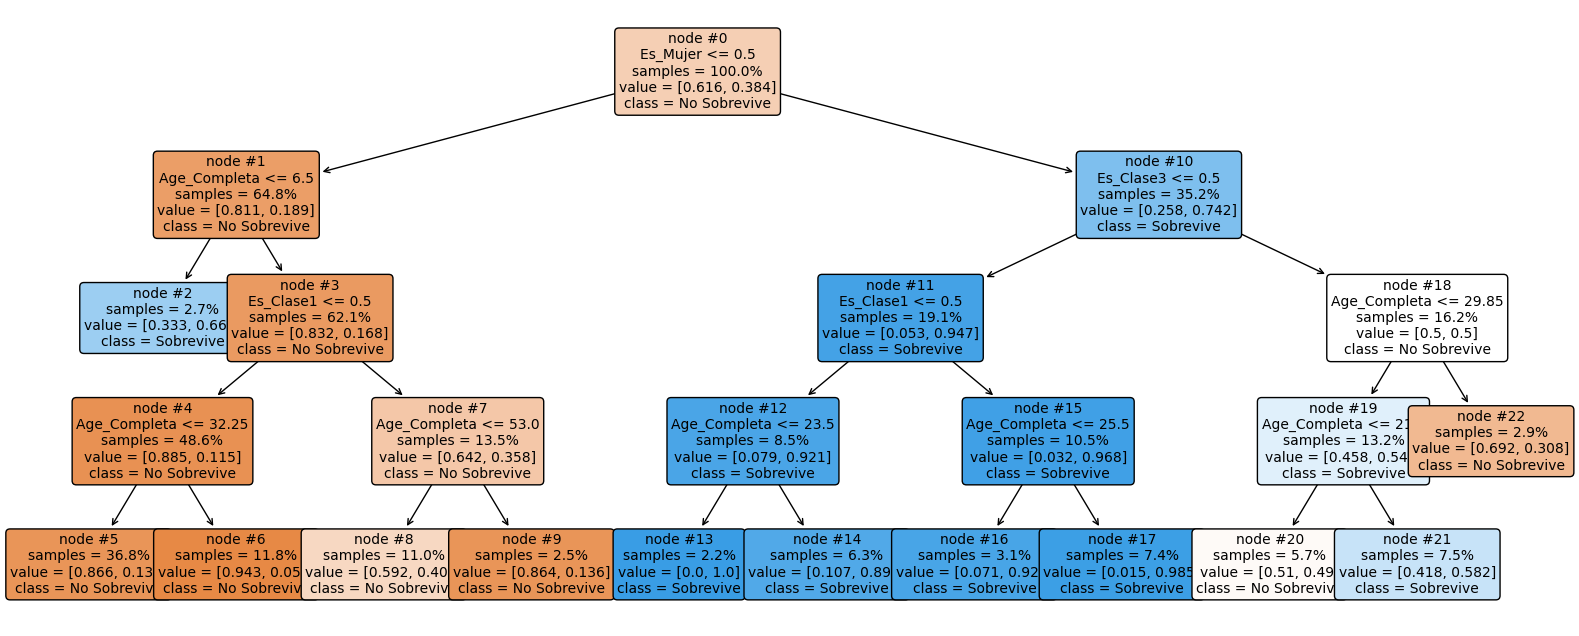

In [161]:
plt.figure(figsize=(20, 8))
plot_tree(clf, 
          filled = True, 
          rounded = True, 
          class_names = ['No Sobrevive','Sobrevive'], 
          feature_names = lista_predictores, 
          impurity = False,
          proportion = True,
          node_ids = True,
          fontsize=10)

In [132]:
# Genero predicciones  
df['Predict_Arbol_Clase'] = clf.predict(df[lista_predictores])
df['Predict_Arbol_Nodo'] = clf.apply(df[lista_predictores])

C:\Users\u634093\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\u634093\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [133]:
df['Predict_Arbol_Clase'].value_counts()

Predict_Arbol_Clase
0    630
1    261
Name: count, dtype: int64

In [134]:
df['Predict_Arbol_Nodo'].value_counts()

Predict_Arbol_Nodo
5     328
6     105
8      98
21     67
17     66
14     56
20     51
16     28
22     26
2      24
9      22
13     20
Name: count, dtype: int64

In [135]:
# Groupby por prediccion de clase: 
resultados = df.groupby('Predict_Arbol_Clase').agg(
    Cant = ('Predict_Arbol_Clase', 'count'),              
    Cant_Sup = ('Survived', 'sum'),            
    Tasa_Sup = ('Survived', 'mean')    
).reset_index()
resultados

,Predict_Arbol_Clase,Cant,Cant_Sup,Tasa_Sup
0,0,630,126,0.200000
1,1,261,216,0.827586


In [136]:
# Groupby por prediccion de nodo: 
resultados_nodo = df.groupby('Predict_Arbol_Nodo').agg(     
    Cant = ('Predict_Arbol_Nodo', 'count'),              
    Cant_Sup = ('Survived', 'sum'),            
    Tasa_Sup = ('Survived', 'mean')    
).reset_index()
resultados_nodo.rename(columns={'Tasa_Sup': 'Predict_Prob_Arbol'}, inplace=True)
resultados_nodo

,Predict_Arbol_Nodo,Cant,Cant_Sup,Predict_Prob_Arbol
0,2,24,16,0.666667
1,5,328,44,0.134146
2,6,105,6,0.057143
3,8,98,40,0.408163
4,9,22,3,0.136364
5,13,20,20,1.000000
6,14,56,50,0.892857
7,16,28,26,0.928571
8,17,66,65,0.984848
9,20,51,25,0.490196


In [137]:
# Genero la columna con la predicción 
df = df.merge(resultados_nodo[['Predict_Arbol_Nodo','Predict_Prob_Arbol']],
              left_on = 'Predict_Arbol_Nodo',
              right_on = 'Predict_Arbol_Nodo',
              how = 'left')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Completa,Es_Mujer,Es_Clase1,Es_Clase3,Predict_Arbol_Clase,Predict_Arbol_Nodo,Predict_Prob_Arbol
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,False,False,True,0,5,0.134146
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,True,True,False,1,17,0.984848
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,True,False,True,1,21,0.582090
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,True,True,False,1,17,0.984848
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,False,False,True,0,6,0.057143


<Axes: xlabel='PassengerId', ylabel='Predict_Prob_Arbol'>

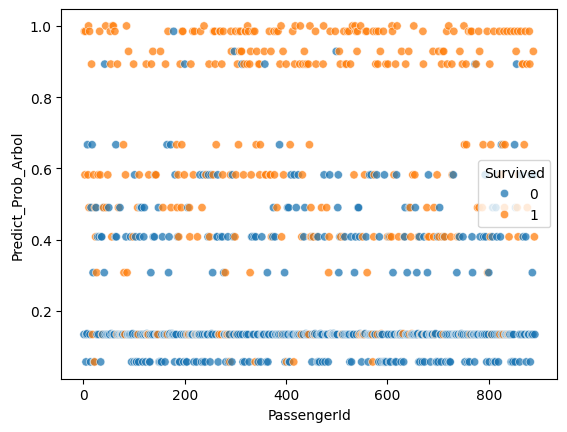

In [138]:
# Graficamente 
g1 = plt.figure()
sns.scatterplot(data = df,
                x = 'PassengerId',
                y = 'Predict_Prob_Arbol',  
                alpha = 0.75,
                hue = 'Survived')

<Axes: xlabel='Predict_Prob_Arbol', ylabel='Probability'>

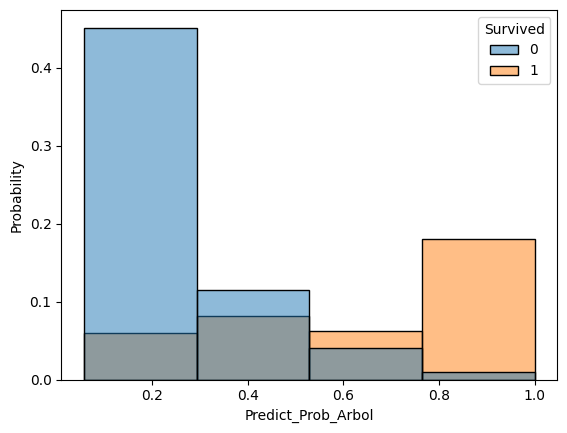

In [139]:
# Histogramas de predicción 
g1 = plt.figure()
sns.histplot(data = df,
             x = 'Predict_Prob_Arbol',  
             alpha = 0.5,
             hue = 'Survived',
             stat = 'probability', 
             bins = 4)

<Axes: xlabel='Predict_Arbol_Nodo', ylabel='Predict_Prob_Arbol'>

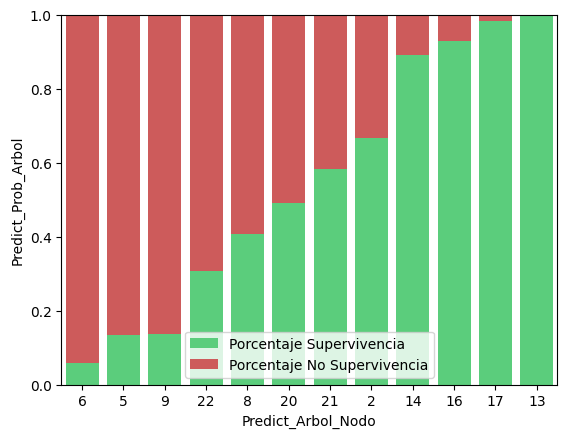

In [140]:
# Barplot por nodo 
resultados_nodo['Tasa_NoSup'] = (1 - resultados_nodo['Predict_Prob_Arbol'])
resultados_nodo = resultados_nodo.sort_values('Predict_Prob_Arbol')

# Crear el barplot ordenado
sns.barplot(data=resultados_nodo,
            x='Predict_Arbol_Nodo',
            y='Predict_Prob_Arbol', 
            label='Porcentaje Supervivencia',
            color='#48E074',
            order=resultados_nodo['Predict_Arbol_Nodo'])

sns.barplot(data=resultados_nodo, 
            x='Predict_Arbol_Nodo', 
            y='Tasa_NoSup', 
            bottom=resultados_nodo['Predict_Prob_Arbol'], 
            label='Porcentaje No Supervivencia',
            color='#E04848',
            order=resultados_nodo['Predict_Arbol_Nodo'])

# Regresión logística

In [141]:
# Genero el modelo
formula = "Survived ~ Es_Mujer + Es_Clase1 + Es_Clase3 + Age_Completa"
reg_log = smf.logit(formula, data = df).fit()

# Ver el resumen de resultados
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.451900
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.3214
Time:                        19:12:53   Log-Likelihood:                -402.64
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.946e-81
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1887      0.287     -0.659      0.510      -0.750       0.373
Es_Mujer

In [142]:
coeficientes = reg_log.params
coeficientes.round(4)

Intercept           -0.1887
Es_Mujer[T.True]     2.6113
Es_Clase1[T.True]    1.1222
Es_Clase3[T.True]   -1.2070
Age_Completa        -0.0333
dtype: float64

In [143]:
pvalores = reg_log.pvalues
pvalores.round(6)

Intercept            0.510192
Es_Mujer[T.True]     0.000000
Es_Clase1[T.True]    0.000013
Es_Clase3[T.True]    0.000000
Age_Completa         0.000006
dtype: float64

In [144]:
# Predicciones 
df['Predict_Prob_RegLog'] = reg_log.predict(df)

<Axes: xlabel='PassengerId', ylabel='Predict_Prob_RegLog'>

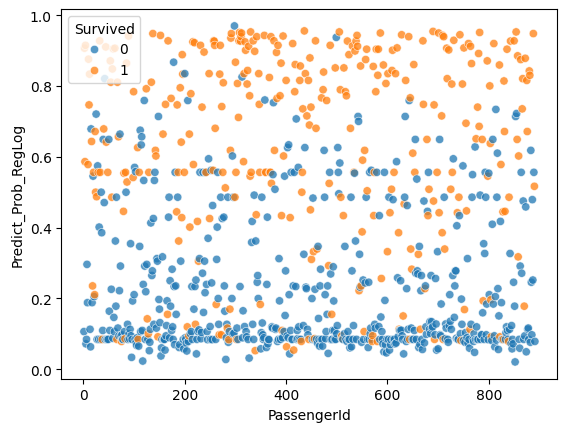

In [145]:
# Graficamente 
g1 = plt.figure()
sns.scatterplot(data = df,
                x = 'PassengerId',
                y = 'Predict_Prob_RegLog',  
                alpha = 0.75,
                hue = 'Survived')

<Axes: xlabel='Predict_Prob_RegLog', ylabel='Probability'>

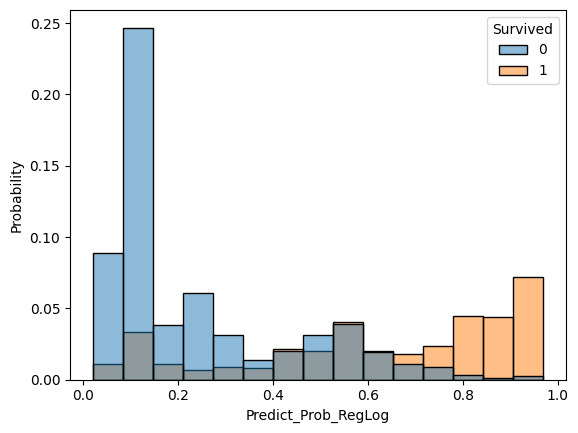

In [146]:
# Histogramas de predicción 
g1 = plt.figure()
sns.histplot(data = df,
             x = 'Predict_Prob_RegLog',  
             alpha = 0.5,
             hue = 'Survived',
             stat = 'probability', 
             bins = 15)

In [147]:
# Groupby por prediccion de clase: 
df['Predict_RegLog_Clase'] = df['Predict_Prob_RegLog'] > 0.5
resultados = df.groupby('Predict_RegLog_Clase').agg(
    Cant = ('Predict_RegLog_Clase', 'count'),              
    Cant_Sup = ('Survived', 'sum'),            
    Tasa_Sup = ('Survived', 'mean')    
).reset_index()
resultados

,Predict_RegLog_Clase,Cant,Cant_Sup,Tasa_Sup
0,False,568,98,0.172535
1,True,323,244,0.755418


In [148]:
# Groupby por prediccion de decil: 
bin_edges = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
bin_labels = range(1, 11)
df['Predict_RegLog_Bin'] = pd.cut(df['Predict_Prob_RegLog'], 
                                  bins=bin_edges, 
                                  labels=bin_labels, 
                                  include_lowest=True)


In [149]:
resultados_nodo = df.groupby('Predict_RegLog_Bin').agg(     
    Cant = ('Predict_RegLog_Bin', 'count'),              
    Cant_Sup = ('Survived', 'sum'),            
    Tasa_Sup = ('Survived', 'mean')    
).reset_index()
resultados_nodo

C:\Users\u634093\AppData\Local\Temp\ipykernel_26920\496831996.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados_nodo = df.groupby('Predict_RegLog_Bin').agg(


,Predict_RegLog_Bin,Cant,Cant_Sup,Tasa_Sup
0,1,233,30,0.128755
1,2,148,20,0.135135
2,3,78,8,0.102564
3,4,39,13,0.333333
4,5,70,27,0.385714
5,6,87,47,0.540230
6,7,49,30,0.612245
7,8,46,32,0.695652
8,9,67,63,0.940299
9,10,74,72,0.972973


<Axes: xlabel='Predict_RegLog_Bin', ylabel='Tasa_Sup'>

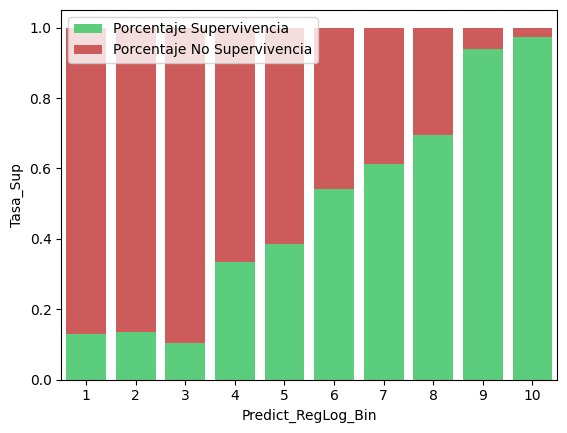

In [150]:
# Barplot por nodo 
resultados_nodo['Tasa_NoSup'] = (1 - resultados_nodo['Tasa_Sup'])
sns.barplot(data = resultados_nodo,
            x = 'Predict_RegLog_Bin',
            y = 'Tasa_Sup', 
            label = 'Porcentaje Supervivencia',
            color = '#48E074')
sns.barplot(data=resultados_nodo, 
            x = 'Predict_RegLog_Bin', 
            y = 'Tasa_NoSup', 
            bottom=resultados_nodo['Tasa_Sup'], 
            label = 'Porcentaje No Supervivencia',
            color = '#E04848')

# Ahora les toca a ustedes.
Se van a juntar en salas de a 4 personas y van a generar dos modelos adicionales: 

1) Regresión logística con variable Fare
2) Regresión logística con variable logaritmo natural de Fare

Mejoraron las predicciones? Cómo sacan esa conclusión? 